In [1]:
pip install tensorflow matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 4.3 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 5.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 909.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 519.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33/33 [tenso

In [3]:
# pip install confusion_matrix
!pip install scikit-learn seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 1.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]earn]


In [6]:
cifar10_path = '/Users/sapient/Downloads/cifar-10-batches'

In [5]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# function to load a single batch of cifar-10 data
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        x = datadict['data']
        y = datadict['labels']
        x = x.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype(np.float32)
        y = np.array(y)
        return x, y

# function to load all batches of cifar-10 data
def load_cifar10(root_dir):
    xs = []
    ys = []
    # load training batches
    for b in range(1, 6):
        file_path = os.path.join(root_dir, f'data_batch_{b}')
        x, y = load_cifar10_batch(file_path)
        xs.append(x)
        ys.append(y)
    # load test batch
    file_path = os.path.join(root_dir, 'test_batch')
    tx, ty = load_cifar10_batch(file_path)
    
    # combine all training batches
    x_train = np.concatenate(xs)
    y_train = np.concatenate(ys)
    
    return (x_train, y_train), (tx, ty)

# specify the path to the extracted cifar-10 dataset
cifar10_path = '/Users/sapient/Downloads/cifar-10-batches'

# load the dataset
(train_images, train_labels), (test_images, test_labels) = load_cifar10(cifar10_path)

# normalize the images to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# build the cnn model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # add input layer here
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# verify the data
print(f"training images shape: {train_images.shape}")
print(f"testing images shape: {test_images.shape}")
print(f"training labels shape: {train_labels.shape}")
print(f"testing labels shape: {test_labels.shape}")

training images shape: (50000, 32, 32, 3)
testing images shape: (10000, 32, 32, 3)
training labels shape: (50000,)
testing labels shape: (10000,)


In [10]:
# train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4108 - loss: 1.6373 - val_accuracy: 0.6103 - val_loss: 1.1147
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6173 - loss: 1.0931 - val_accuracy: 0.6442 - val_loss: 1.0253
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6763 - loss: 0.9244 - val_accuracy: 0.6660 - val_loss: 0.9761
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7205 - loss: 0.8165 - val_accuracy: 0.6855 - val_loss: 0.9195
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7492 - loss: 0.7185 - val_accuracy: 0.6999 - val_loss: 0.8847
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7744 - loss: 0.6460 - val_accuracy: 0.6853 - val_loss: 0.9466
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7948 - loss: 0.5818 - val_accuracy: 0.6935 - val_loss: 0.9156
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8236 - loss: 0

In [7]:
# evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

313/313 - 1s - 2ms/step - accuracy: 0.1143 - loss: 2.3128

Test accuracy: 0.11429999768733978
Test loss: 2.3127551078796387


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


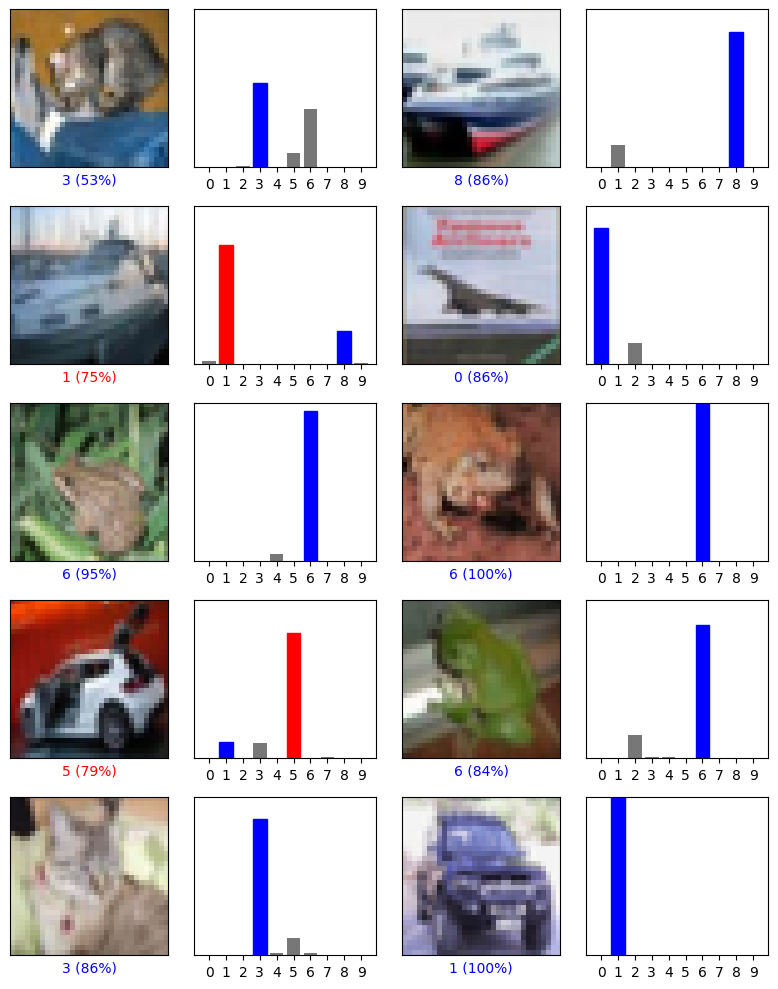

In [11]:
import matplotlib.pyplot as plt

# make predictions
predictions = model.predict(test_images)

# function to plot images and predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{predicted_label} ({100*np.max(predictions_array):2.0f}%)", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# plot the first 5 test images, their predicted labels, and the true labels
num_rows = 5
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()

In [20]:
# save the model
model.save('cifar10_classifier.keras')

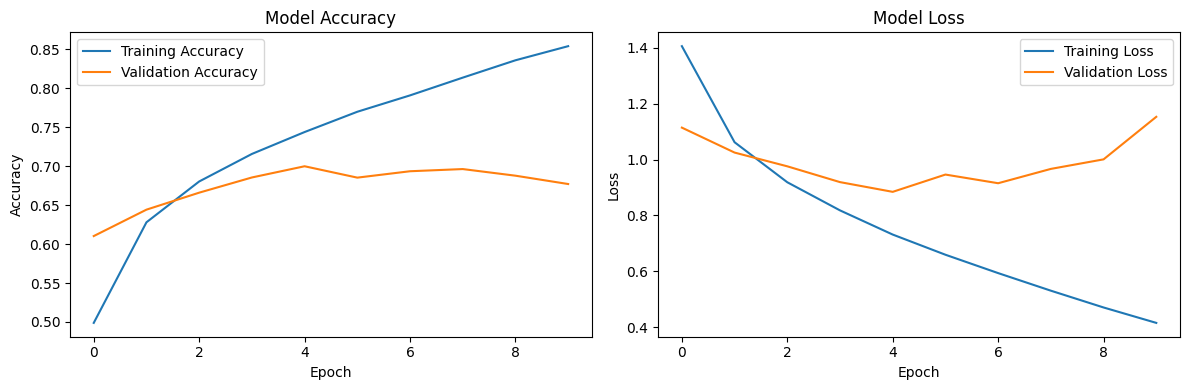

In [12]:
# generate training history plot
plt.figure(figsize=(12, 4))

# plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


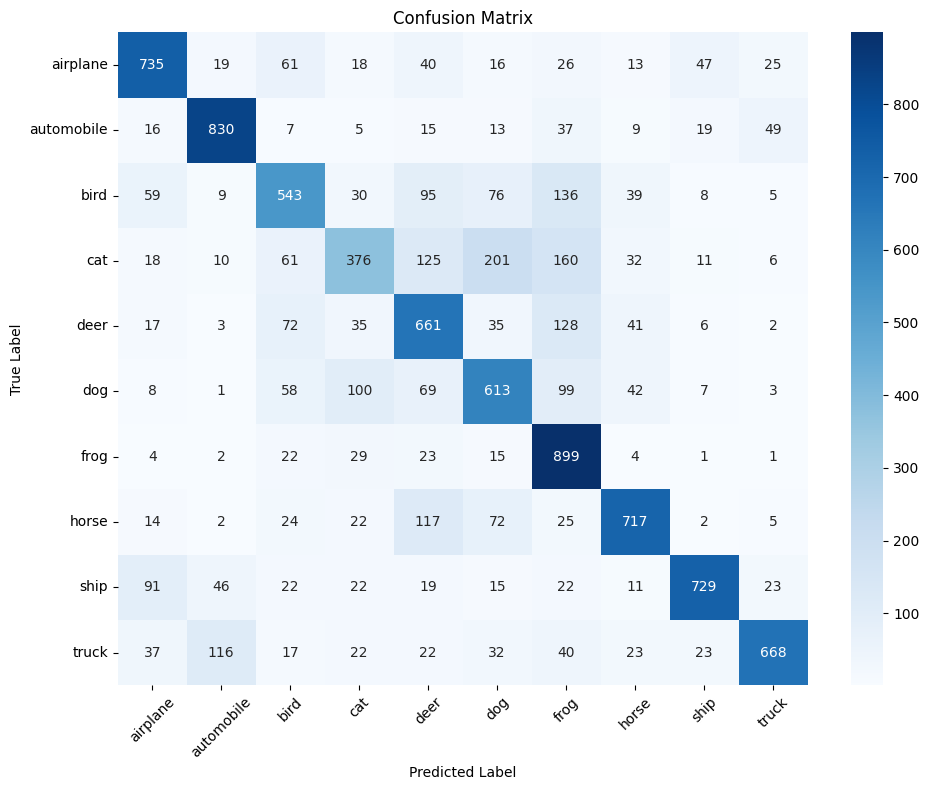

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# define the class names for cifar-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# generate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# assume 'test_images' and 'test_labels' are already loaded
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# get one image from each class
images = []
labels = []
for class_idx in range(10):
    class_images = test_images[test_labels == class_idx]
    images.append(class_images[0])
    labels.append(class_idx)

# create a grid of images
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    plt.axis('off')

plt.tight_layout()
plt.savefig('sample_images_per_class.png')
plt.show()

: 